# Seamless Cloning 
**Satya Mallick, LearnOpenCV.com** 

# Goal 
![Obama](data/images/obama-trump.jpg)

In [1]:
# Standard imports
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from utils import imshow, imshow2, imshow3

In [2]:
# Read images
dst = cv2.imread("data/images/presidents/trump.jpg")
src = cv2.imread("data/images/presidents/obama.jpg")

src_mask = cv2.imread("data/images/presidents/obama-mask.jpg", cv2.IMREAD_GRAYSCALE)

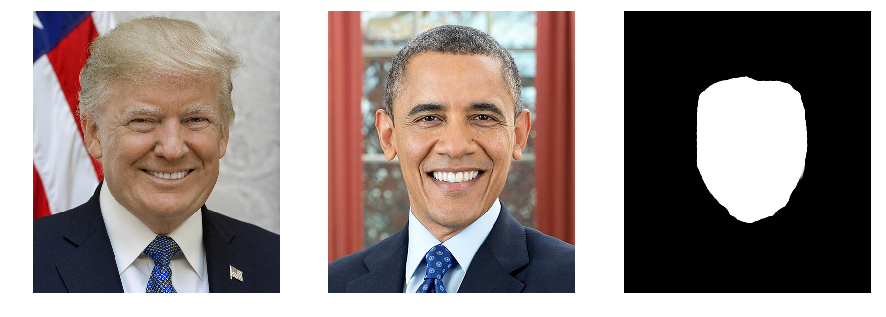

In [5]:
imshow3(dst, src, src_mask)

# Simple Alpha Blending with Mask

1. The lighting in the images is very different
2. The skin tones are very different
3. The blend will look ridiculous

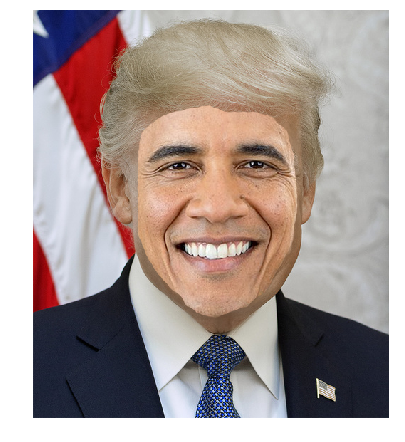

In [8]:
alpha = cv2.cvtColor(src_mask.copy(), cv2.COLOR_GRAY2RGB)
alpha = alpha.astype(np.float32) / 255.0
output_noclone = src * alpha + dst * (1 - alpha)
output_noclone = output_noclone.astype(np.uint8)

imshow(output_noclone, 0.5);

# Solution?

## Option 1
Perform gradient domain **Poisson blending**

1. Find the x and y gradients of the source and destination images
2. Copy the gradients from source images to the destination image
3. Integration the gradients domain with Dirichlet boundary conditions 

## Option 2
Use **cv2.seamlessClone**  ... does all the above for you! 



# Find Blob Centroid 

In [120]:
# Find blob centroid
ret, src_mask_bin = cv2.threshold(src_mask, 128,256, cv2.THRESH_BINARY)
m = cv2.moments(src_mask_bin)
center = (int(m['m01']/m['m00']), int(m['m10']/m['m00']) ) 


![](moments.jpg)

# Seamless Cloning

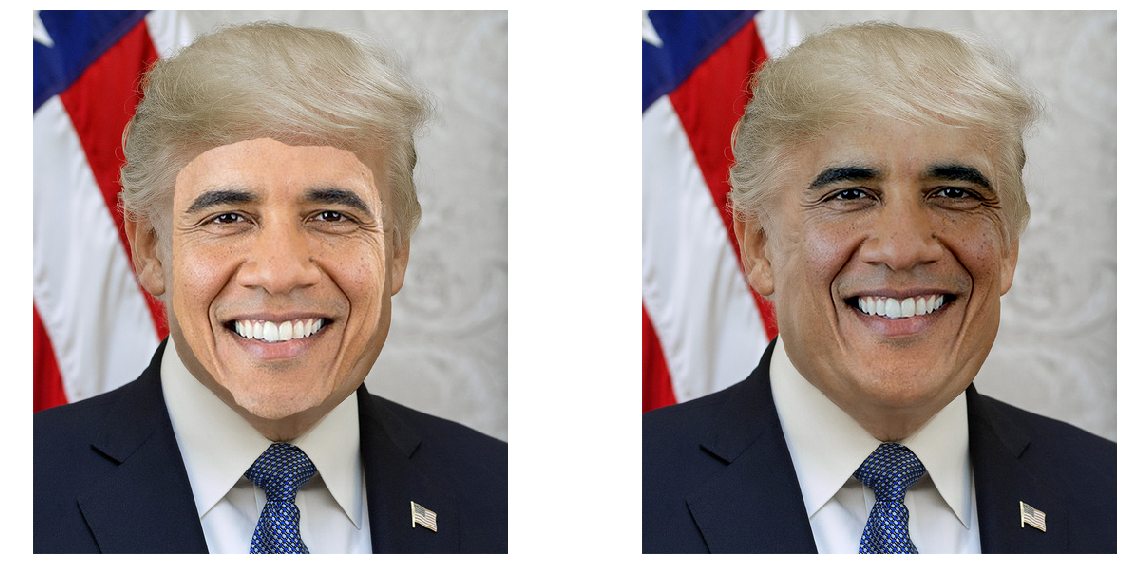

In [121]:
# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

plt.figure(figsize=(20,10)); 
plt.subplot(121); plt.imshow(output_noclone); plt.axis('off'); 
plt.subplot(122); plt.imshow(output); plt.axis('off'); 


# Thank You!